Project Title:
California Housing Price Prediction using Linear Regression

Description:
In this project, I built a Linear Regression model using scikit-learn to predict house prices based on the California Housing dataset. The dataset contains numerical features such as location, population, income, number of rooms, and categorical location information (ocean_proximity).
The project focuses on:
Data exploration and visualization
Handling categorical variables
Training and evaluating a regression model
Comparing predicted vs actual house prices

In [204]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [205]:
ds = pd.read_csv('housing[1].csv')

In [206]:
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [207]:
ds.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [208]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [127]:
ds.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [226]:
ds.shape

(20640, 10)

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

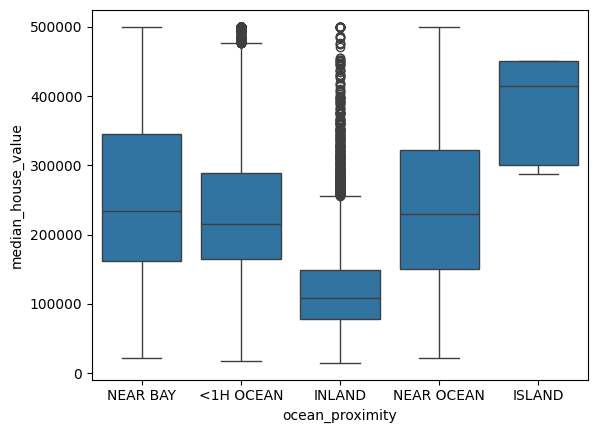

In [219]:
import seaborn as sns
sns.boxplot(x="ocean_proximity", y="median_house_value", data=ds)


In [141]:
x = ds.drop("median_house_value",axis = 1)
y = ds["median_house_value"]

In [154]:
x = pd.get_dummies(x, columns=["ocean_proximity"])


In [155]:
x = x.fillna(x.mean(numeric_only=True))

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [221]:
model = LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [229]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 4904399775.949286
R2 Score: 0.6257351821159696


In [223]:
coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,longitude,-26838.273372
1,latitude,-25468.352050
2,housing_median_age,1102.185084
3,total_rooms,-6.021506
4,total_bedrooms,102.789395
5,population,-38.172906
6,households,48.252753
7,median_income,39473.975175
8,ocean_proximity_<1H OCEAN,-18926.582862
9,ocean_proximity_INLAND,-58713.239023


In [241]:
y_test.iloc[10]

np.float64(123200.0)

In [242]:
pred = model.predict(x_test.iloc[[10]])
pred

array([128222.30114099])

In [228]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MAE: 50701.77903133022
R2: 0.6257351821159696


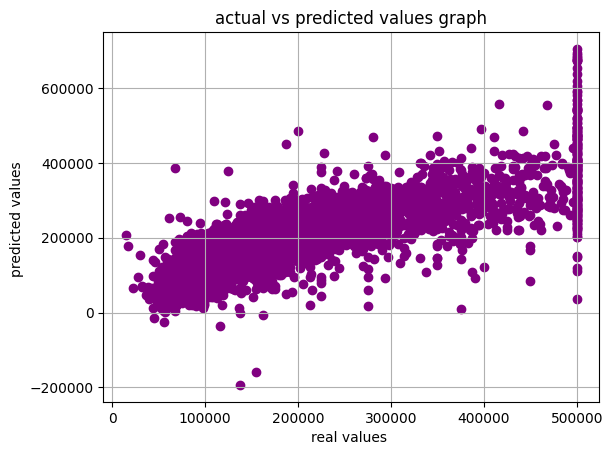

In [201]:
plt.scatter(y_test,model.predict(x_test),color ="purple")
plt.grid()
plt.xlabel("real values ")
plt.ylabel("predicted values ")
plt.title("actual vs predicted values graph")
plt.show()